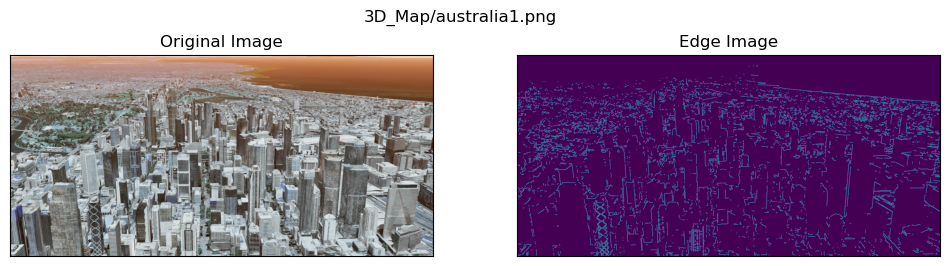

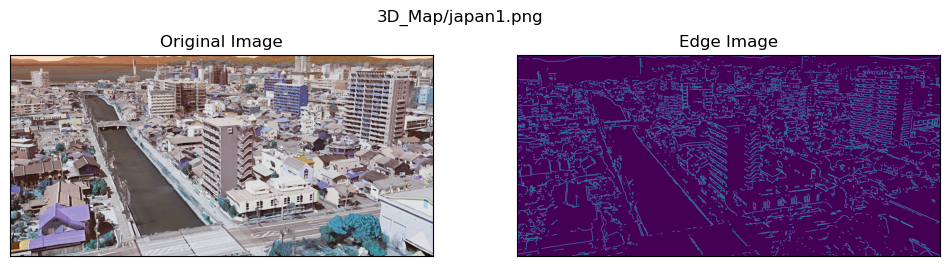

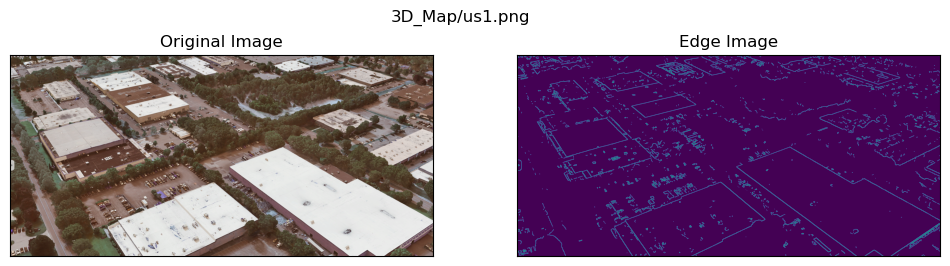

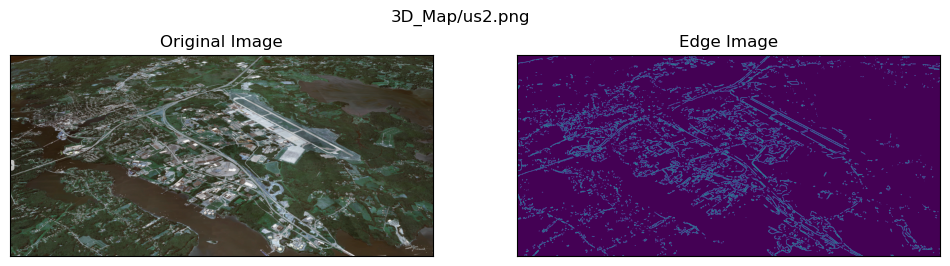

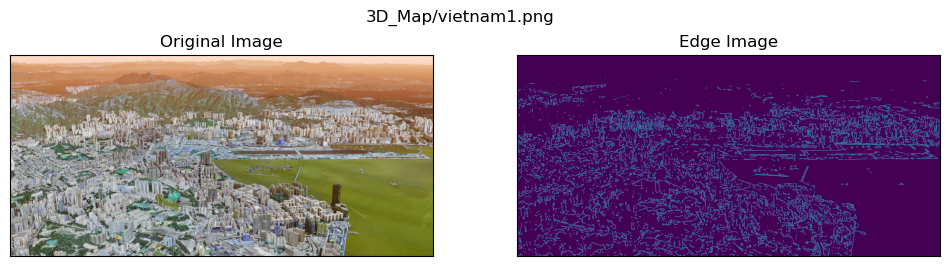

In [7]:
import cv2
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import os

def edgeCanny(imageFile):
    img = Image.open(imageFile)
    img = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    edges = cv2.Canny(img, 400, 500)
    plt.subplots(1, 2, figsize=(12, 3))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Original Image')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(1, 2, 2)
    plt.imshow(edges)
    plt.title('Edge Image')
    plt.xticks([])
    plt.yticks([])
    plt.suptitle(imageFile)
    plt.show()
    return edges

edgeImgs = []

for file in os.listdir('3D_Map'):
    if file.endswith('.png'):
        edgeImgs.append(edgeCanny(f'3D_Map/{file}'))

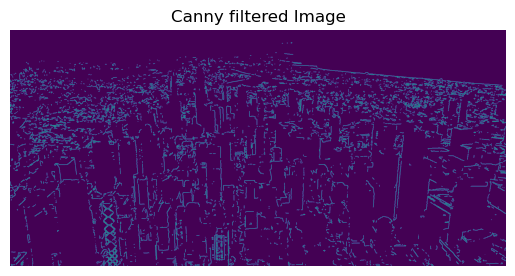

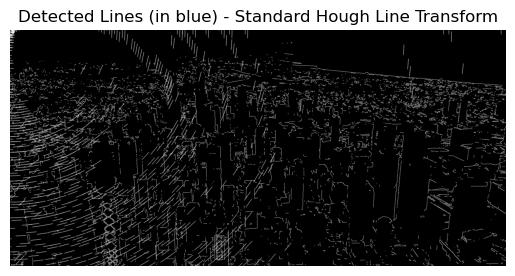

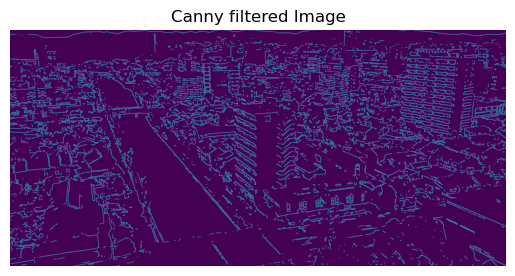

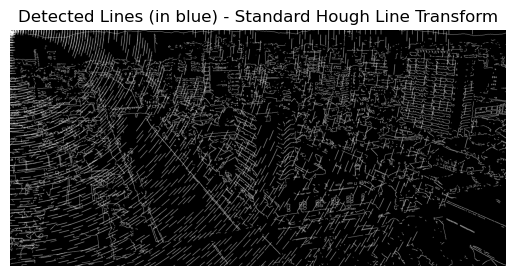

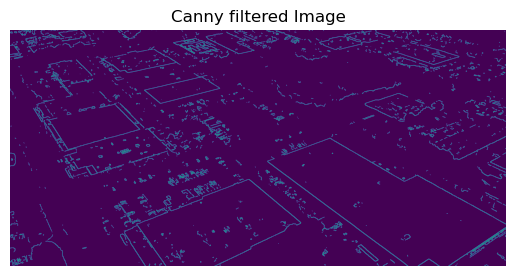

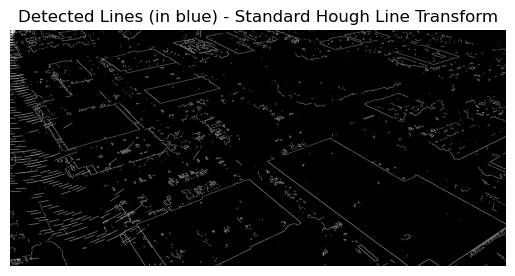

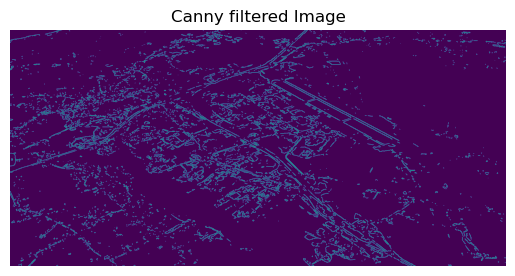

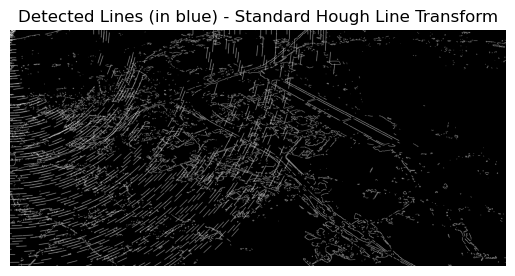

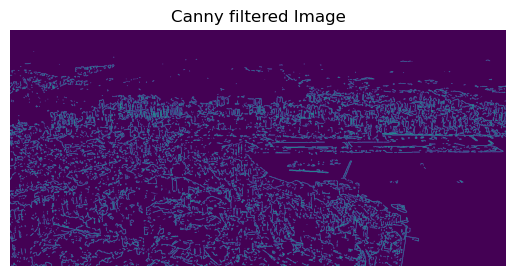

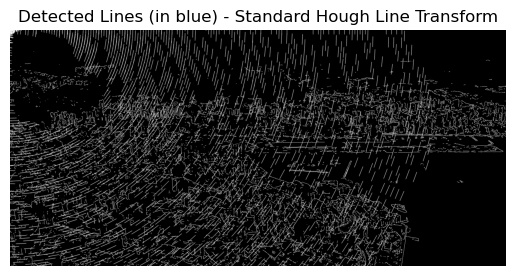

In [8]:
import numpy as np
import math

def show_image(img, title="Image"):
    plt.imshow(img)
    plt.title(title)
    plt.axis("off")
    plt.show()

def HoughLines(cannyImg, d=20):
    cdst = cv2.cvtColor(cannyImg, cv2.COLOR_GRAY2BGR)
    lines = cv2.HoughLines(cannyImg, 10, np.pi / 180, 500, None, 0, 0)
    #print('lines - ', lines)
    # Draw the lines
    if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + d*(-b)), int(y0 + d*(a)))
            pt2 = (int(x0 - d*(-b)), int(y0 - d*(a)))
            cv2.line(cdst, pt1, pt2, (255,255,255), 1, cv2.LINE_AA)
    show_image(cannyImg, "Canny filtered Image")
    show_image(cdst, "Detected Lines (in blue) - Standard Hough Line Transform")
    # cv.imshow("Canny filtered Image", cannyImg)
    # cv.imshow("Detected Lines (in red) - Standard Hough Line Transform", cdst)

for edgeImg in edgeImgs:
    HoughLines(edgeImg)

In [ ]:
import cv2
import numpy as np
import math

def calculate_perspective_angle(image_path):
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Step 1: Apply Canny edge detection
    edges = cv2.Canny(image, 50, 150)
    
    # Step 2: Detect lines using the Hough Transform
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=50, maxLineGap=10)
    
    # Initialize lists to store the slopes and intercepts of the detected lines
    slopes = []
    intercepts = []
    
    # Step 3: Calculate the slope (angle) of each line
    for line in lines:
        x1, y1, x2, y2 = line[0]
        if x2 != x1:  # Avoid division by zero for vertical lines
            slope = (y2 - y1) / (x2 - x1)
            intercept = y1 - slope * x1
            slopes.append(slope)
            intercepts.append(intercept)

    # Step 4: Find the vanishing point by calculating intersections of lines
    vanishing_points = []
    for i in range(len(slopes)):
        for j in range(i + 1, len(slopes)):
            # Calculate intersection point of line i and line j
            if slopes[i] != slopes[j]:  # Only intersect lines with different slopes
                x_vanishing = (intercepts[j] - intercepts[i]) / (slopes[i] - slopes[j])
                y_vanishing = slopes[i] * x_vanishing + intercepts[i]
                vanishing_points.append((x_vanishing, y_vanishing))

    # Calculate the average vanishing point
    if vanishing_points:
        avg_vanishing_point = np.mean(vanishing_points, axis=0)
    else:
        print("No vanishing points found.")
        return None

    # Step 5: Calculate the perspective angle
    # Assume the image center as reference point
    image_center = (image.shape[1] / 2, image.shape[0] / 2)
    delta_x = avg_vanishing_point[0] - image_center[0]
    delta_y = avg_vanishing_point[1] - image_center[1]
    
    # Calculate angle in degrees
    perspective_angle = math.degrees(math.atan2(delta_y, delta_x))
    
    # Display results
    print(f"Average Vanishing Point: {avg_vanishing_point}")
    print(f"Perspective Angle: {perspective_angle:.2f} degrees")
    
    # Optional visualization
    color_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(color_image, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.circle(color_image, (int(avg_vanishing_point[0]), int(avg_vanishing_point[1])), 10, (0, 0, 255), -1)
    cv2.circle(color_image, (int(image_center[0]), int(image_center[1])), 5, (255, 0, 0), -1)
    cv2.imshow("Detected Lines and Vanishing Point", color_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
    return perspective_angle

# Example usage:
image_path = '3D_Map/vietnam1.png'
angle = calculate_perspective_angle(image_path)
print(f"Estimated Perspective Angle: {angle:.2f} degrees")


Average Vanishing Point: [971.72460696 511.53736396]
Perspective Angle: 69.53 degrees


qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/priyanshu/.conda/envs/myenv/lib/python3.11/site-packages/cv2/qt/plugins"
QFont::fromString: Invalid description 'Inter,12,-1,5,500,0,0,0,0,0,0,0,0,0,0,1,Medium'
QFont::fromString: Invalid description 'Intel One Mono,10,-1,5,400,0,0,0,0,0,0,0,0,0,0,1'
QFont::fromString: Invalid description 'Inter,10,-1,5,400,0,0,0,0,0,0,0,0,0,0,1'
QFont::fromString: Invalid description 'Inter,10,-1,5,600,0,0,0,0,0,0,0,0,0,0,1,SemiBold'
QObject::moveToThread: Current thread (0x11601b40) is not the object's thread (0x128b2940).
Cannot move to target thread (0x11601b40)

QObject::moveToThread: Current thread (0x11601b40) is not the object's thread (0x128b2940).
Cannot move to target thread (0x11601b40)

QObject::moveToThread: Current thread (0x11601b40) is not the object's thread (0x128b2940).
Cannot move to target thread (0x11601b40)

QObject::moveToThread: Current thread (0x11601b40) is not the object's thread (0x128b2940).
Cannot m